In [1]:
%matplotlib notebook
import gudhi as gd
import matplotlib.pyplot as plt
import numpy as np
from igraph import *
from scipy import sparse
import ripser

<IPython.core.display.Javascript object>


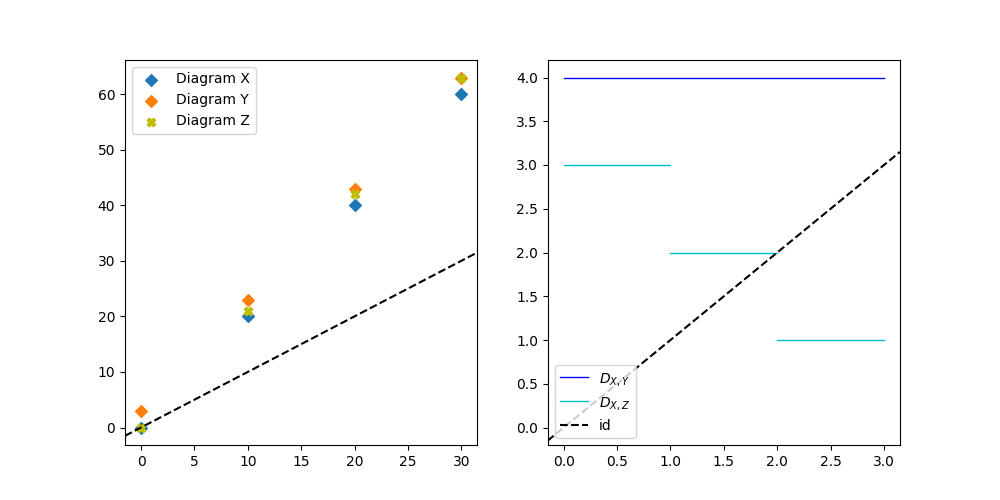

In [2]:
#set up parameters
n_points = 4

#Create artificial persistence diagrams
Dgm1x = np.array([10*x for x in range(0,n_points)])
Dgm1y = np.array([20*x for x in range(0,n_points)])
Dgm2x = np.array([10*x for x in range(0,n_points)])
Dgm2y = np.array([20*x+x for x in range(0,n_points)])
Dgm3x = np.array([10*x for x in range(0,n_points)])
Dgm3y = np.array([20*x+(n_points-1) for x in range(0,n_points)])

Dgm1 = np.array([(Dgm1x[i],Dgm1y[i]) for i in range(0,n_points)])
Dgm2 = np.array([(Dgm2x[i],Dgm2y[i]) for i in range(0,n_points)])
Dgm3 = np.array([(Dgm3x[i],Dgm3y[i]) for i in range(0,n_points)])


#Plot the PDs
f, axs = plt.subplots(1,2, figsize=(10, 5))
ax1 = plt.subplot(121)
plt.scatter(Dgm1x, Dgm1y, marker = 'D', label = 'Diagram X')
plt.scatter(Dgm3x, Dgm3y, marker = 'D', label = 'Diagram Y')
plt.scatter(Dgm2x, Dgm2y, marker = 'X', c='y', label = 'Diagram Z')
plt.axline((0,0),slope=1, c='k', ls='--')

#compute the D_{X,Y} values
d_vals = np.linspace(0,n_points,n_points+1)
r_vals12 = [gd.prokhorov_distance(Dgm1, Dgm2, np.array([r])) for r in d_vals]
r_vals13 = [gd.prokhorov_distance(Dgm1, Dgm3, np.array([r])) for r in d_vals]
plt.legend(loc="upper left")

#Plot the D_{X,Y}
ax2 = plt.subplot(122)
for i in range(1,n_points+1):
    plt.plot((r_vals13[i],r_vals13[i-1]),(i, i), c='b', ls='-', linewidth = 1.0, label = '$D_{X,Y}$')
    plt.plot((r_vals12[i],r_vals12[i-1]),(i, i), c='c', ls='-', linewidth = 1.0, label = '$D_{X,Z}$')
plt.axline((0,0),slope=1, c='k', ls='--', label = "id")
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc="lower left")


plt.show()

In [33]:
def D(r_vals, t):
    return np.min(np.where(np.array(r_vals)<=t))

In [35]:
help(gd.prokhorov)

Help on module gudhi.prokhorov in gudhi:

NAME
    gudhi.prokhorov

FUNCTIONS
    prokhorov_distance(...) method of builtins.PyCapsule instance
        prokhorov_distance(diagram_1: numpy.ndarray[numpy.float64], diagram_2: numpy.ndarray[numpy.float64], coef: numpy.ndarray[numpy.float64]) -> float
        
        
        Compute the Prokhorov distance between two diagrams.
        Points at infinity and on the diagonal are supported.
        
        :param diagram_1: The first diagram.
        :type diagram_1: numpy array of shape (m,2)
        :param diagram_2: The second diagram.
        :type diagram_2: numpy array of shape (n,2)
        :param coef: The coefficients of the polynomial in the Prokhorov metric. Ensure non-negative entries and zeroth entry = 0
        :type e: numpy array of shape (d,1)
        :rtype: float
        :returns: the Prokhorov distance.

DATA
    __license__ = 'GPL v3'

FILE
    /usr/local/lib64/python3.8/site-packages/gudhi-3.4.0a0-py3.8-linux-x86_64.eg

<IPython.core.display.Javascript object>


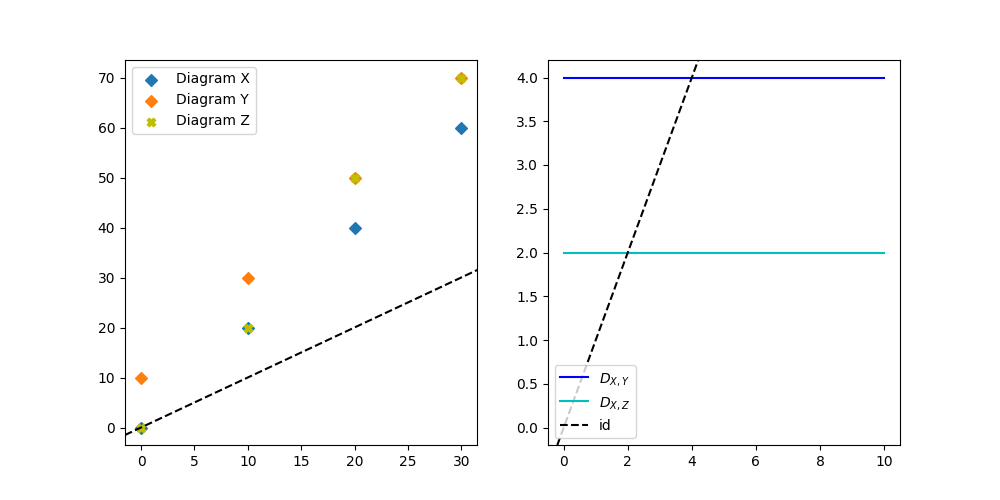

In [22]:
#set up parameters
n_points = 4
#Create artificial persistence diagrams
Dgm1x = np.array([10*x for x in range(0,n_points)])
Dgm1y = np.array([20*x for x in range(0,n_points)])
Dgm2x = np.array([10*x for x in range(0,n_points)])
Dgm2y = np.array([20*x+10*np.floor(x/(n_points/2)) for x in range(0,4)])
Dgm3x = np.array([10*x for x in range(0,n_points)])
Dgm3y = np.array([20*x+10 for x in range(0,n_points)])

Dgm1 = np.array([(Dgm1x[i],Dgm1y[i]) for i in range(0,n_points)])
Dgm2 = np.array([(Dgm2x[i],Dgm2y[i]) for i in range(0,n_points)])
Dgm3 = np.array([(Dgm3x[i],Dgm3y[i]) for i in range(0,n_points)])

#Plot the PDs
f, axs = plt.subplots(1,2, figsize=(10, 5))
ax1 = plt.subplot(121)
plt.scatter(Dgm1x, Dgm1y, marker = 'D', label = "Diagram X")
plt.scatter(Dgm3x, Dgm3y, marker = 'D', label = "Diagram Y")
plt.scatter(Dgm2x, Dgm2y, marker = 'X', c='y', label = "Diagram Z")
plt.axline((0,0),slope=1, c='k', ls='--')
plt.legend(loc="upper left")


#compute the D_{X,Y} values
d_vals = np.linspace(0,n_points,n_points+1)
r_vals12 = [gd.prokhorov_distance(Dgm1, Dgm2, np.array([r])) for r in d_vals]
r_vals13 = [gd.prokhorov_distance(Dgm1, Dgm3, np.array([r])) for r in d_vals]
#Plot the D_{X,Y}
ax2 = plt.subplot(122)
for i in range(1,n_points+1):
    plt.plot((r_vals13[i],r_vals13[i-1]),(i, i), c='b', label = "$D_{X,Y}$")
    plt.plot((r_vals12[i],r_vals12[i-1]),(i, i), c='c', label = "$D_{X,Z}$")
plt.axline((0,0),slope=1, c='k', ls='--', label = "id")
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc="lower left")
plt.show()

In [11]:
def getLowerStarTimeSeriesD(x):
    N = x.size
    # Add edges between adjacent points in the time series, with the "distance" 
    # along the edge equal to the max value of the points it connects
    I = np.arange(N-1)
    J = np.arange(1, N)
    V = np.maximum(x[0:-1], x[1::])
    # Add vertex birth times along the diagonal of the distance matrix
    I = np.concatenate((I, np.arange(N)))
    J = np.concatenate((J, np.arange(N)))
    V = np.concatenate((V, x))
    #Create the sparse distance matrix
    D = sparse.coo_matrix((V, (I, J)), shape=(N, N)).tocsr()
    return D

<IPython.core.display.Javascript object>


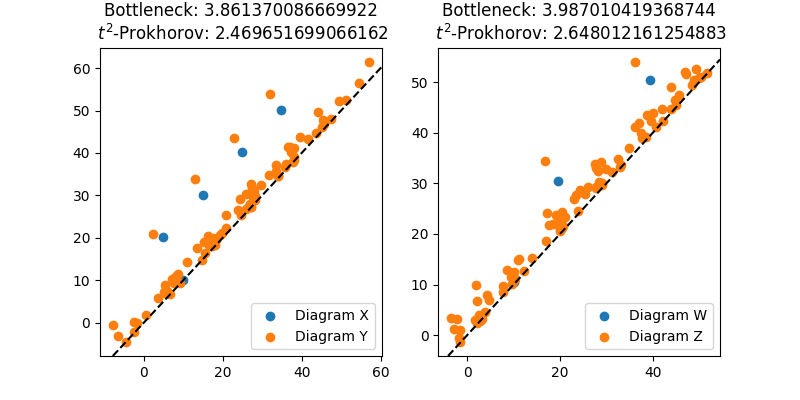

<IPython.core.display.Javascript object>


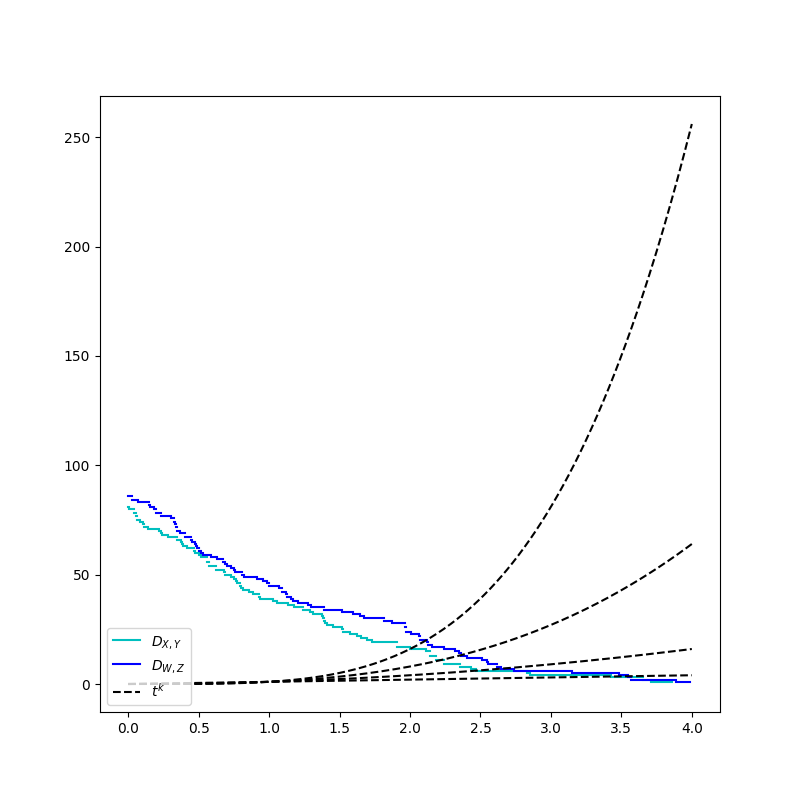

In [24]:
np.random.seed(0)
NSamples = 250
t = np.linspace(0, 50, NSamples)
x1 = 10*(np.cos(0.2*np.pi*t) + 0.1*t)
y1 = x1 + 2*np.random.randn(NSamples)

Dx = getLowerStarTimeSeriesD(x1)
Dy = getLowerStarTimeSeriesD(y1)
Ix1 = ripser.ripser(Dx, distance_matrix=True, maxdim=0)['dgms'][0]
Iy1 = ripser.ripser(Dy, distance_matrix=True, maxdim=0)['dgms'][0]

#Remove point at infinity before bottleneck/wasserstein
Ix1 = Ix1[np.isfinite(Ix1[:, 1]), :]
Iy1 = Iy1[np.isfinite(Iy1[:, 1]), :]
n_points1=len(Ix1)+len(Iy1)
#compute the D_{X,Y} values
d_vals1 = np.linspace(0,n_points1,n_points1+1)
r_vals1 = [gd.prokhorov_distance(Ix1, Iy1, np.array([r])) for r in d_vals1]

plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.scatter([p[0] for p in Ix1], [p[1] for p in Ix1], label = 'Diagram X')
plt.scatter([p[0] for p in Iy1], [p[1] for p in Iy1], label = 'Diagram Y')
plt.axline((0,0),slope=1, c='k', ls='--')
plt.legend(loc="lower right")
plt.title("Bottleneck: {}\n $t^2$-Prokhorov: {}".format(gd.bottleneck_distance(Ix1,Iy1), gd.prokhorov_distance(Ix1,Iy1,np.array([0,0,1]))))

np.random.seed(0)
NSamples = 250
t = np.linspace(0, 50, NSamples)
x2 = 10*(np.cos(0.1*np.pi*t) + 0.1*t)
y2 = x2 + 2*np.random.randn(NSamples)

Dx = getLowerStarTimeSeriesD(x2)
Dy = getLowerStarTimeSeriesD(y2)
Ix2 = ripser.ripser(Dx, distance_matrix=True, maxdim=0)['dgms'][0]
Iy2 = ripser.ripser(Dy, distance_matrix=True, maxdim=0)['dgms'][0]

Ix2 = Ix2[np.isfinite(Ix2[:, 1]), :]
Iy2 = Iy2[np.isfinite(Iy2[:, 1]), :]
n_points2=len(Ix2)+len(Iy2)
#compute the D_{X,Y} values
d_vals2 = np.linspace(0,n_points2,n_points2+1)
r_vals2 = [gd.prokhorov_distance(Ix2, Iy2, np.array([r])) for r in d_vals2]

plt.subplot(122)
plt.scatter([p[0] for p in Ix2], [p[1] for p in Ix2], label = 'Diagram W')
plt.scatter([p[0] for p in Iy2], [p[1] for p in Iy2], label = 'Diagram Z')
plt.axline((0,0),slope=1, c='k', ls='--')
plt.legend(loc="lower right")
plt.title("Bottleneck: {}\n $t^2$-Prokhorov: {}".format(gd.bottleneck_distance(Ix2,Iy2), gd.prokhorov_distance(Ix2,Iy2,np.array([0,0,1]))))
plt.show()

#Plot the D_{X,Y}
plt.figure(figsize=(8, 8))
for i in range(1,n_points1+1):
    plt.plot((r_vals1[i],r_vals1[i-1]),(i, i), c='c', label='$D_{X,Y}$')
for i in range(1,n_points2+1):    
    plt.plot((r_vals2[i],r_vals2[i-1]),(i, i), c='b', label = '$D_{W,Z}$')

#Plot monomials
t = np.linspace(0,4,401)
for p in range (1,5):
    plt.plot(t,t**p, c='k', ls='--', label = '$t^k$')
#plt.axline((0,0),slope=1, c='k', ls='--')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc="lower left")
plt.show()

<IPython.core.display.Javascript object>


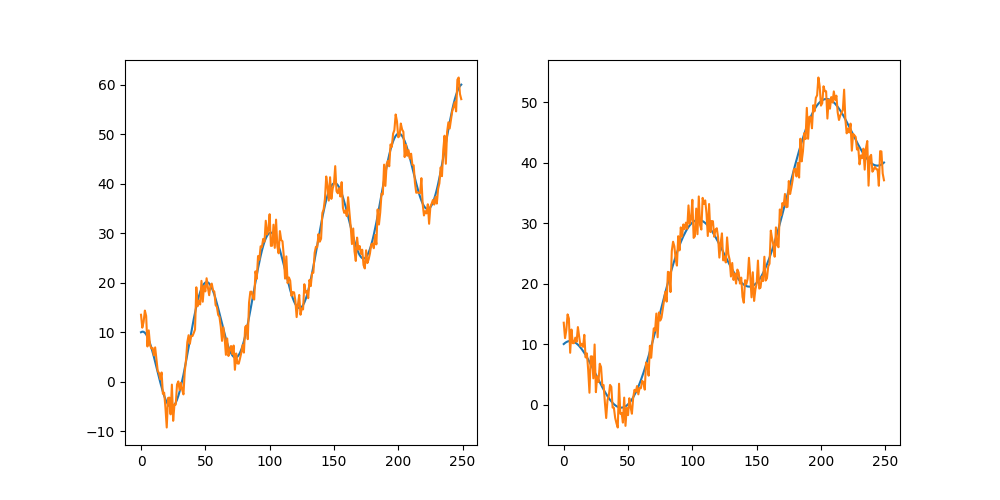

In [17]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(x1)
plt.plot(y1)
plt.subplot(122)
plt.plot(x2)
plt.plot(y2)
plt.show()

<IPython.core.display.Javascript object>


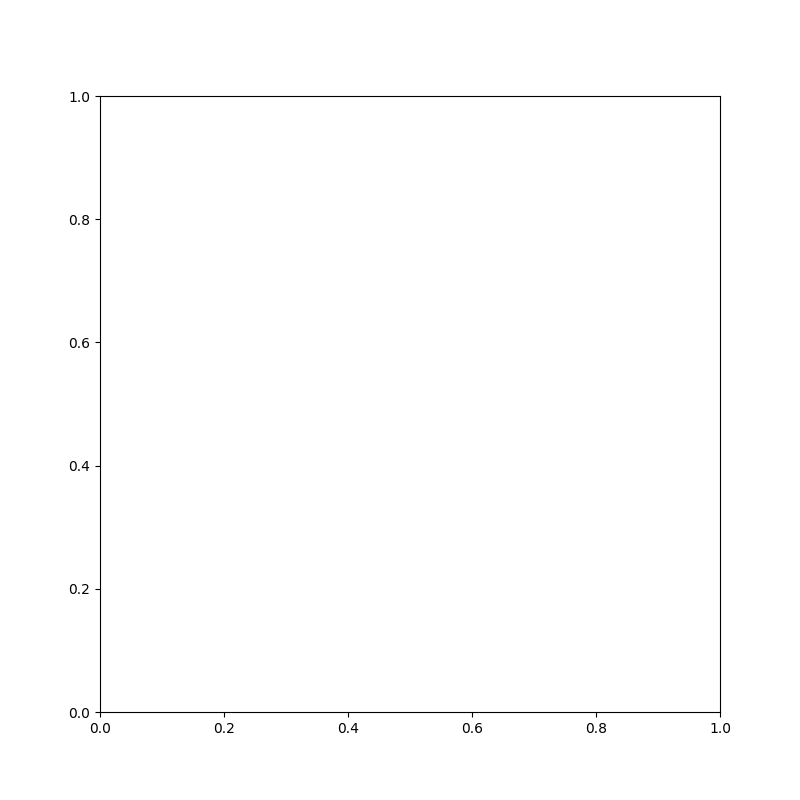

NameError: name 'n_points1' is not defined

In [37]:
import gudhi.hera
t = np.linspace(1,4,301)
plt.figure(figsize=(8, 8))
axes = plt.gca()
for i in range(1,n_points1+1):
    plt.plot((r_vals1[i],r_vals1[i-1]),(i, i), c='c', label='$D_{X,Y}$')
for p in range (1,5):
    W_p = gudhi.hera.wasserstein_distance(Ix1, Iy1, order = p, internal_p = float("inf"))
    plt.plot(t,(W_p**p)/(t**p), ls='--', label = '$W_{}^{}/t^{}$'.format(p,p,p))

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc="lower left")
axes.set_ylim([-1,n_points1])
plt.show()

In [38]:
dgms = [Ix1, Iy1, Ix2, Iy2]
names = ["X","Y","W","Z"]
cols = ['b','c','k','r']
plt.figure(figsize=(8, 8))
j=1
for dgm in dgms:
    n_points = len(dgm)
    d_vals = np.linspace(0,n_points,n_points+1)
    r_vals = [gd.prokhorov_distance(dgm, np.array([]), np.array([r])) for r in d_vals]
    for i in range(1,n_points+1):
        plt.plot((r_vals[i],r_vals[i-1]),(i, i), c=cols[j-1], label='$D_{%s,\emptyset}$' %names[(j-1)])
    j = j+1
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc="upper right")
plt.show()

NameError: name 'Ix1' is not defined

<IPython.core.display.Javascript object>


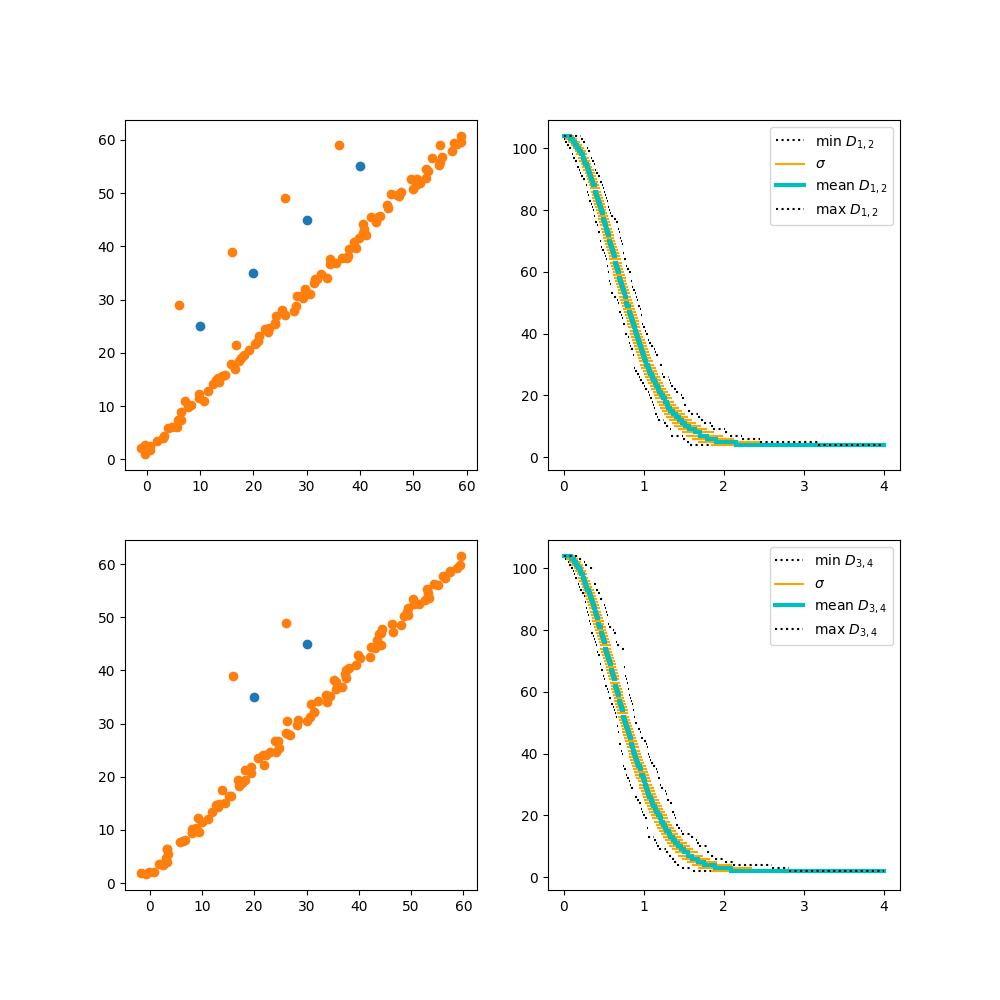

In [83]:
#Dgm 1 has two off-diagonal points
dgm1 = np.array([[10,20,30,40],[25,35,45,55]])
n_iter = 100
n_samples = 100
n_points = n_samples+4
W12 = [None] * n_iter
P12 = [None] * n_iter
r_vals = [None] * n_iter
for i in range(0,n_iter):
    dgm2 = np.append([[6,16,26,36],[29,39,49,59]], [np.linspace(0,60,n_samples)-np.abs(np.random.normal(0,1,n_samples)), np.linspace(0,60,n_samples)+np.abs(np.random.normal(0,1,n_samples))], axis = 1)
    d_vals = np.linspace(0,n_points,n_points+1)
    r_vals[i] = [gd.prokhorov_distance(dgm1.T, dgm2.T, np.array([r])) for r in d_vals]
    W12[i] = gd.hera.wasserstein_distance(dgm1.T, dgm2.T, order = 1, internal_p = float("inf"))
    P12[i] = gd.prokhorov_distance(dgm1.T, dgm2.T, np.array([0,1]))
fig = plt.figure(figsize = (10,10))
plt.subplot(221)
plt. scatter(dgm1[0],dgm1[1])
plt. scatter(dgm2[0],dgm2[1])
r_mean12 = np.mean(r_vals, axis = 0)
r_max12 = np.max(r_vals, axis=0)
r_min12 = np.min(r_vals, axis=0)
r_std12 = np.std(r_vals, axis = 0)
plt.subplot(222)
for i in range(1,n_points+1):
    plt.plot((r_min12[i],r_min12[i-1]),(i, i), c='k', ls = ':', label='min $D_{1,2}$')
    plt.plot((r_mean12[i-1]-r_std12[i-1],r_mean12[i-1]+r_std12[i-1]),(i, i), c='orange', label='$\sigma$')
    plt.plot((r_mean12[i]-r_std12[i],r_mean12[i]+r_std12[i]),(i, i), c='orange', label='$\sigma$')
    plt.plot((r_mean12[i],r_mean12[i-1]),(i, i), c='c', linewidth = 3, label='mean $D_{1,2}$')
    plt.plot((r_max12[i],r_max12[i-1]),(i, i), c='k', ls = ':', label='max $D_{1,2}$')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc="upper right")

#Dgm 3 has two off-diagonal points

dgm3 = np.array([[20,30],[35,45]])
n_iter = 100
n_samples = 102
n_points = n_samples+2
r_vals = [None] * n_iter
W34 = [None] * n_iter
P34 = [None] * n_iter
for i in range(0,n_iter):
    dgm4 = np.append([[16,26],[39,49]], [np.linspace(0,60,n_samples)-np.abs(np.random.normal(0,1,n_samples)), np.linspace(0,60,n_samples)+np.abs(np.random.normal(0,1,n_samples))], axis = 1)
    d_vals = np.linspace(0,n_points,n_points+1)
    r_vals[i] = [gd.prokhorov_distance(dgm3.T, dgm4.T, np.array([r])) for r in d_vals]
    W34[i] = gd.hera.wasserstein_distance(dgm3.T, dgm4.T, order = 1, internal_p = float("inf"))
    P34[i] = gd.prokhorov_distance(dgm3.T, dgm4.T, np.array([0,1]))
plt.subplot(223)
plt. scatter(dgm3[0],dgm3[1])
plt. scatter(dgm4[0],dgm4[1])
r_mean34 = np.mean(r_vals, axis = 0)
r_max34 = np.max(r_vals, axis=0)
r_min34 = np.min(r_vals, axis=0)
r_std34 = np.std(r_vals, axis = 0)
plt.subplot(224)
for i in range(1,n_points+1):
    plt.plot((r_min34[i],r_min34[i-1]),(i, i), c='k', ls = ':', label='min $D_{3,4}$')
    plt.plot((r_mean34[i-1]-r_std34[i-1],r_mean34[i-1]+r_std34[i-1]),(i, i), c='orange', label='$\sigma$')
    plt.plot((r_mean34[i]-r_std34[i],r_mean34[i]+r_std34[i]),(i, i), c='orange', label='$\sigma$')
    plt.plot((r_mean34[i],r_mean34[i-1]),(i, i), c='c', linewidth = 3, label='mean $D_{3,4}$')
    plt.plot((r_max34[i],r_max34[i-1]),(i, i), c='k', ls = ':', label='max $D_{3,4}$')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc="upper right")

plt.show()

<IPython.core.display.Javascript object>


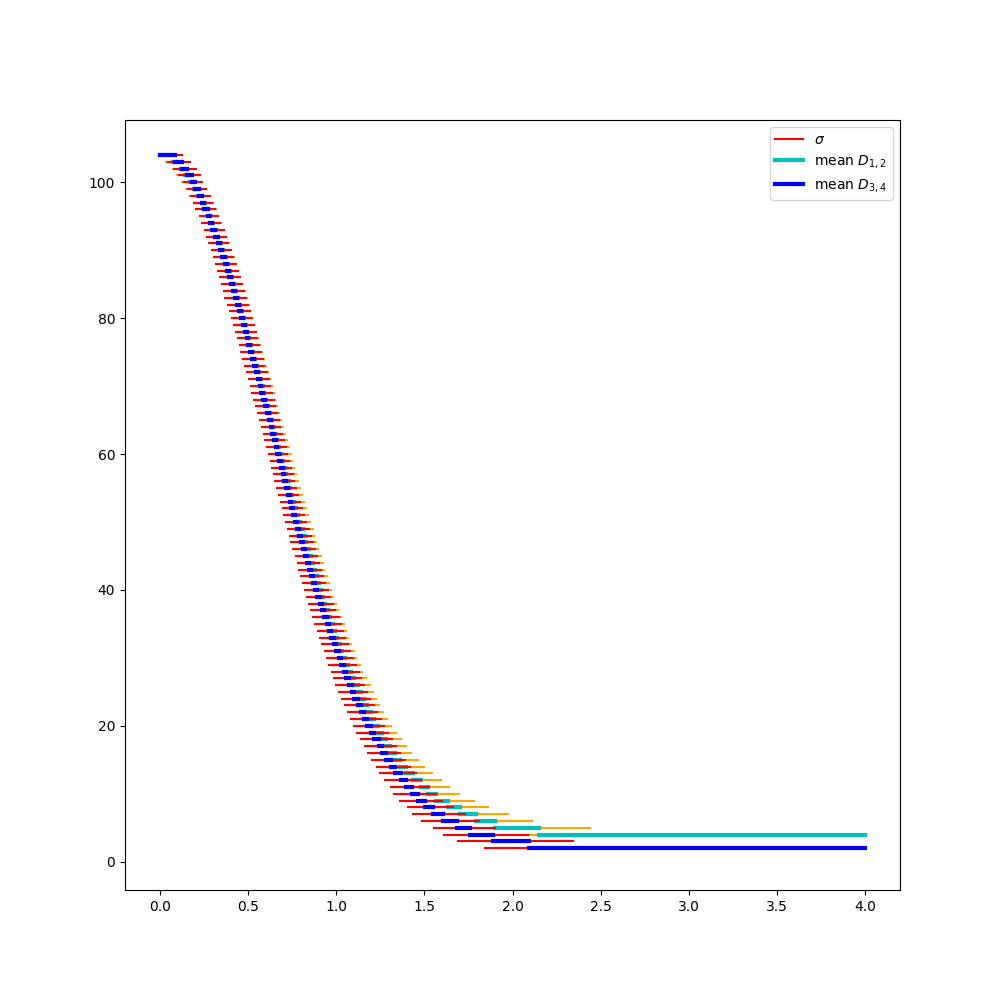

In [84]:
plt.figure(figsize = (10,10))
n_points = 104
for i in range(1,n_points+1):    
    plt.plot((r_mean12[i-1]-r_std12[i-1],r_mean12[i-1]+r_std12[i-1]),(i, i), c='orange', label='$\sigma$')
    plt.plot((r_mean12[i]-r_std12[i],r_mean12[i]+r_std12[i]),(i, i), c='orange', label='$\sigma$')
    plt.plot((r_mean12[i],r_mean12[i-1]),(i, i), c='c', linewidth = 3, label='mean $D_{1,2}$')
for i in range(1,n_points+1):
    plt.plot((r_mean34[i-1]-r_std34[i-1],r_mean34[i-1]+r_std34[i-1]),(i, i), c='red', label='$\sigma$')
    plt.plot((r_mean34[i]-r_std34[i],r_mean34[i]+r_std34[i]),(i, i), c='red', label='$\sigma$')
    plt.plot((r_mean34[i],r_mean34[i-1]),(i, i), c='b', linewidth = 3, label='mean $D_{3,4}$')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc="upper right")
plt.show()

In [20]:
print("W_1(dgm1, dgm2) = {}".format(np.mean(W12)))
print("W_1(dgm3, dgm4) = {}".format(np.mean(W34)))
print("d_P(dgm1, dgm2) = {}".format(np.mean(P12)))
print("d_P(dgm3, dgm4) = {}".format(np.mean(P34)))

W_1(dgm1, dgm2) = 216.21376416795206
W_1(dgm3, dgm4) = 213.94032465121597
d_P(dgm1, dgm2) = 4.0
d_P(dgm3, dgm4) = 3.63361302865619


<IPython.core.display.Javascript object>


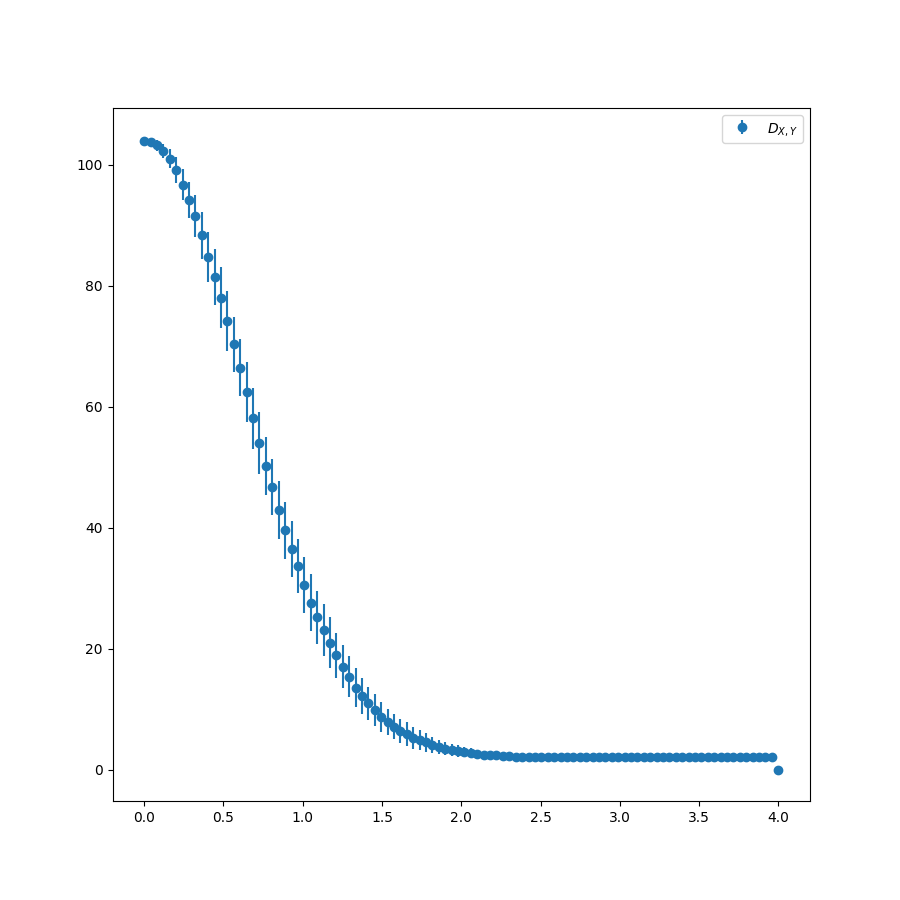

In [85]:
ts = np.linspace(0,4,100)
Dmean = np.array([np.mean([D(r,t) for r in r_vals]) for t in ts])
Dstd = np.array([np.std([D(r,t) for r in r_vals]) for t in ts])
plt.figure(figsize = (9,9))

plt.errorbar(ts,Dmean,Dstd, linestyle='None', marker='o', label = "$D_{X,Y}$")
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc="upper right")

plt.show()

In [79]:
np.abs(np.random.normal(0,1,n_samples))

array([0.31289033, 0.52496543, 0.16651628, 0.62852559, 0.17946215,
       0.15768104, 2.21004751, 1.17319422, 0.11695184, 0.26368045,
       1.10120947, 0.64413721, 0.63016612, 0.25715825, 0.13444714,
       2.28284734, 0.5655325 , 0.42731285, 0.7635948 , 1.67157056,
       0.8327088 , 0.18047612, 1.64732146, 0.63840523, 0.50793483,
       1.28243919, 0.70056276, 1.14741537, 0.08074437, 1.01622409,
       0.83036533, 0.21065003, 1.32532053, 1.01237466, 0.69888294,
       0.86485534, 1.21583951, 1.14747071, 1.09367828, 1.94309118,
       0.47738654, 2.11743664, 0.67083234, 0.5488215 , 0.52813339,
       0.94882711, 0.71352659, 0.20671919, 0.34400574, 1.42804349,
       0.42035916, 0.13779578, 1.46014566, 2.0502633 , 1.32230216,
       2.08583306, 0.70209511, 0.39209085, 0.75704781, 0.03869167,
       0.32843104, 0.51715208, 0.74702269, 0.24032007, 0.58657343,
       0.0338559 , 0.79554241, 1.06215707, 0.49494468, 0.51103067,
       1.09005936, 0.70599135, 0.82798684, 1.52593868, 0.76056